In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [33]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'HINDUNILVR.NS']
start_date = '2018-08-13'
end_date = '2023-08-13'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2018-08-13,995.552368,1580.764038,606.066528,1064.120239,1765.560547
2018-08-14,994.338806,1594.845093,605.873108,1084.637573,1768.561401
2018-08-16,987.960754,1588.581909,615.015076,1075.857056,1772.930786
2018-08-17,988.746155,1631.875977,615.359253,1078.500244,1776.682495
2018-08-20,997.718018,1624.789673,595.526306,1106.409180,1774.210938


In [14]:
log_returns = np.log(data / data.shift(1))
log_returns = log_returns.dropna()
print(log_returns.head())

Ticker      HDFCBANK.NS  HINDUNILVR.NS   INFY.NS  RELIANCE.NS    TCS.NS
Date                                                                   
2018-08-14    -0.001220       0.008868 -0.000319     0.019098  0.001698
2018-08-16    -0.006435      -0.003935  0.014976    -0.008128  0.002468
2018-08-17     0.000795       0.026889  0.000559     0.002454  0.002114
2018-08-20     0.009033      -0.004352 -0.032761     0.025548 -0.001392
2018-08-21    -0.000071      -0.013883 -0.000217     0.009911  0.003824


In [20]:
def expected_returns(weights, log_returns):
  return np.sum(log_returns.mean()*weights)

In [16]:
def standard_deviation(weights, cov_matrix):
  variance = weights.T @ cov_matrix @weights
  return np.sqrt(variance)


In [18]:
cov_matrix = log_returns.cov()
print(cov_matrix)

Ticker         HDFCBANK.NS  HINDUNILVR.NS   INFY.NS  RELIANCE.NS    TCS.NS
Ticker                                                                    
HDFCBANK.NS       0.000289       0.000077  0.000105     0.000142  0.000081
HINDUNILVR.NS     0.000077       0.000233  0.000082     0.000096  0.000073
INFY.NS           0.000105       0.000082  0.000342     0.000116  0.000189
RELIANCE.NS       0.000142       0.000096  0.000116     0.000390  0.000112
TCS.NS            0.000081       0.000073  0.000189     0.000112  0.000257


In [23]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_returns = expected_returns(weights, log_returns)
portfolio_standard_deviation = standard_deviation(weights, cov_matrix)


In [22]:
def random_z_score():
  return np.random.normal(0,1)

In [24]:
days = 5
def scenario_gain_loss(portfolio_value, portfolio_standard_deviation, z_score, days):
  return portfolio_value*portfolio_expected_returns*days + portfolio_value*portfolio_standard_deviation*z_score*np.sqrt(days)

In [27]:
simulations = 10000
scenarioReturn = []
simulation_horizon = 1

for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_standard_deviation, z_score, days))

In [31]:
confidence_interval = 0.95
VaR = - np.percentile(scenarioReturn, 100*(1 - confidence_interval))
print(VaR)

42610.0842547745


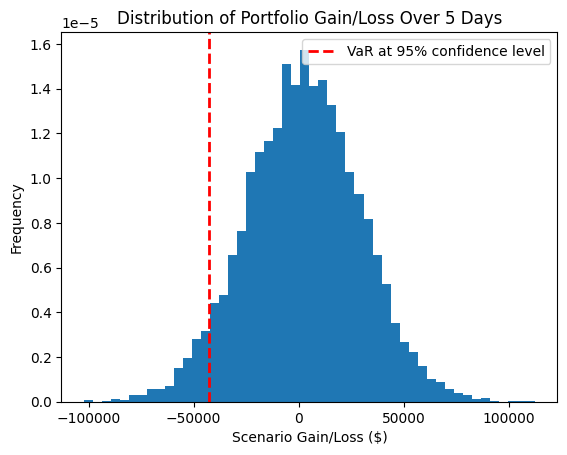

In [32]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()